# Statsmodels Time Series Excercises
For this set of exercises we're using data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.

Data source: https://fred.stlouisfed.org/series/IPG2211A2N

In [10]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('EnergyProduction.csv',index_col=0,parse_dates=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


### 1. Assign a frequency of 'MS' to the DatetimeIndex.

In [11]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [12]:
df.index.freq = 'MS'

In [13]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### 2.  Plot the dataset.

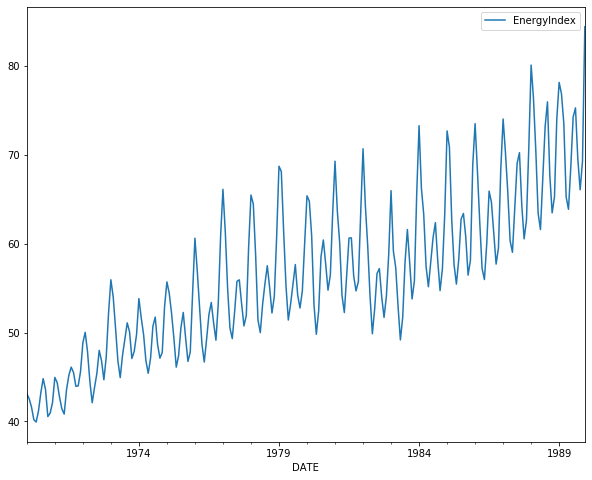

In [16]:
df.plot(figsize=(10,8)).autoscale(axis='x',tight=True);

### 3. Add a column that shows a 12-month Simple Moving Average (SMA).<br>&nbsp;&nbsp;&nbsp;&nbsp;Plot the result.

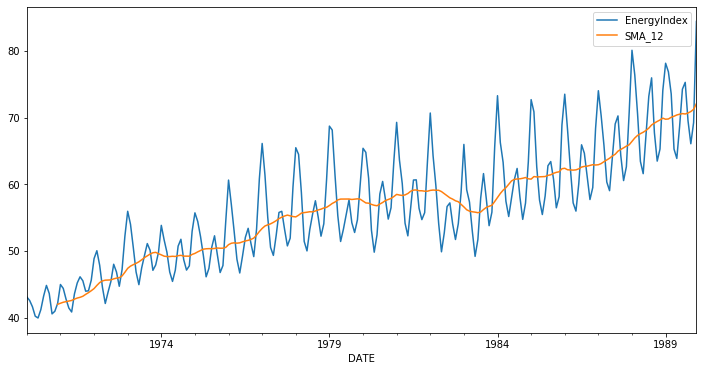

In [17]:
df['SMA_12'] = df['EnergyIndex'].rolling(window=12).mean()
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);

### 4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result.

In [18]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [22]:
df['EWMA']=df['EnergyIndex'].ewm(span=12).mean()

In [23]:
df.columns

Index(['EnergyIndex', 'SMA_12', 'EWMA'], dtype='object')

In [25]:
df['SES12']=SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=2/(12+1),optimized=False).fittedvalues.shift(-1)


In [26]:
df.columns

Index(['EnergyIndex', 'SMA_12', 'EWMA', 'SES12'], dtype='object')

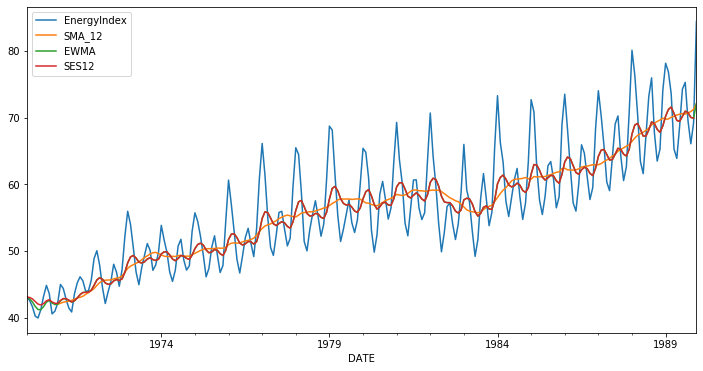

In [27]:
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);

### 5.  Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [30]:
df['TES-mul_12']=ExponentialSmoothing(df['EnergyIndex'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

C:\Users\ebineet\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [31]:
df.head()

,EnergyIndex,SMA_12,EWMA,SES12,TES-mul_12
DATE,,,,,
1970-01-01,43.0869,NaN,43.086900,43.086900,43.102044
1970-02-01,42.5577,NaN,42.800250,43.005485,41.068353
1970-03-01,41.6215,NaN,42.340184,42.792564,39.725047
1970-04-01,40.1982,NaN,41.664043,42.393431,37.962088
1970-05-01,39.9321,NaN,41.193480,42.014765,38.599450


In [34]:
df.columns

Index(['EnergyIndex', 'SMA_12', 'EWMA', 'SES12', 'TES-mul_12'], dtype='object')

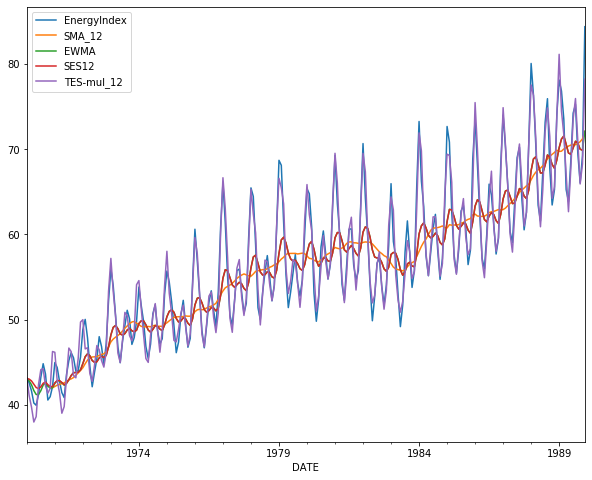

In [35]:
df[['EnergyIndex','SMA_12', 'EWMA', 'SES12', 'TES-mul_12']].plot(figsize=(10,8))

### Optional. Plot the same  as above, but for only the first two years.

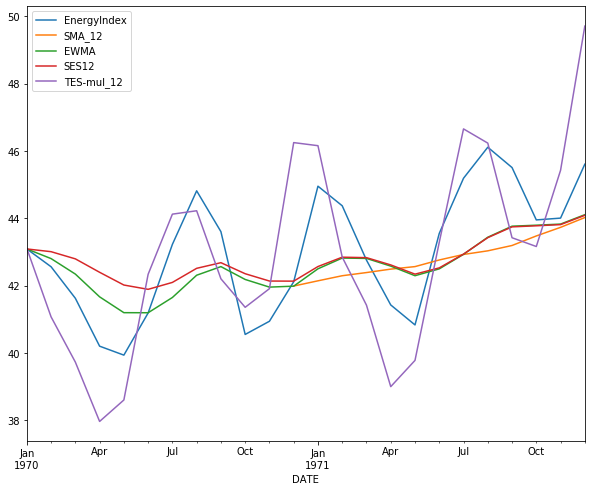

In [36]:
df[['EnergyIndex','SMA_12', 'EWMA', 'SES12', 'TES-mul_12']].iloc[:24].plot(figsize=(10,8))